In [1]:
from gensim.models.word2vec import LineSentence
from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec
import matplotlib.pyplot as plt

In [2]:
import logging
logging.basicConfig(level=logging.INFO, force = True)
logger = logging.getLogger()
logger.info("Logging initialized")

INFO:root:Logging initialized


In [3]:
loss_list = []
class Callback(CallbackAny2Vec):
    def __init__(self):
        self.epoch = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        loss_list.append(loss)
        logger.info('Loss after epoch {}:{}'.format(self.epoch, loss))
        model.running_training_loss = 0.0
        self.epoch = self.epoch + 1

In [4]:
model = Word2Vec(sg=1, vector_size=100, window=3, min_count=10, workers=5)

INFO:gensim.utils:Word2Vec lifecycle event {'params': 'Word2Vec<vocab=0, vector_size=100, alpha=0.025>', 'datetime': '2023-05-19T15:41:51.796103', 'gensim': '4.3.1', 'python': '3.11.3 | packaged by conda-forge | (main, Apr  6 2023, 09:05:00) [Clang 14.0.6 ]', 'platform': 'macOS-12.6-x86_64-i386-64bit', 'event': 'created'}


In [5]:
sentences = LineSentence('processed-corpus.txt')

In [6]:
model.build_vocab(sentences, progress_per=5000000)

INFO:gensim.models.word2vec:collecting all words and their counts
INFO:gensim.models.word2vec:PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO:gensim.models.word2vec:PROGRESS: at sentence #5000000, processed 40831628 words, keeping 101552 word types
INFO:gensim.models.word2vec:PROGRESS: at sentence #10000000, processed 81753225 words, keeping 114802 word types
INFO:gensim.models.word2vec:PROGRESS: at sentence #15000000, processed 122575037 words, keeping 122333 word types
INFO:gensim.models.word2vec:PROGRESS: at sentence #20000000, processed 163439274 words, keeping 127317 word types
INFO:gensim.models.word2vec:collected 130029 word types from a corpus of 191558143 raw words and 23453583 sentences
INFO:gensim.models.word2vec:Creating a fresh vocabulary
INFO:gensim.utils:Word2Vec lifecycle event {'msg': 'effective_min_count=10 retains 79373 unique words (61.04% of original 130029, drops 50656)', 'datetime': '2023-05-19T15:43:08.605477', 'gensim': '4.3.1', 'python':

In [7]:
#we override alpha with small values, since default values result in poor train performance. See loss plot below
model.train(sentences, epochs=100, start_alpha=0.0001, end_alpha=0.00001, total_examples=model.corpus_count, total_words=model.corpus_total_words, compute_loss=True, report_delay=300, callbacks=[Callback()])


INFO:gensim.utils:Word2Vec lifecycle event {'msg': 'training model with 5 workers on 79373 vocabulary and 100 features, using sg=1 hs=0 sample=0.001 negative=5 window=3 shrink_windows=True', 'datetime': '2023-05-19T15:43:09.423833', 'gensim': '4.3.1', 'python': '3.11.3 | packaged by conda-forge | (main, Apr  6 2023, 09:05:00) [Clang 14.0.6 ]', 'platform': 'macOS-12.6-x86_64-i386-64bit', 'event': 'train'}
INFO:gensim.models.word2vec:EPOCH 0 - PROGRESS: at 0.51% examples, 937538 words/s, in_qsize 9, out_qsize 0
INFO:gensim.models.word2vec:EPOCH 0: training on 191558143 raw words (185889644 effective words) took 177.6s, 1046906 effective words/s
INFO:root:Loss after epoch 0:65791416.0
INFO:gensim.models.word2vec:EPOCH 1 - PROGRESS: at 0.53% examples, 974067 words/s, in_qsize 9, out_qsize 0
INFO:gensim.models.word2vec:EPOCH 1: training on 191558143 raw words (185893121 effective words) took 176.4s, 1053781 effective words/s
INFO:root:Loss after epoch 1:67453424.0
INFO:gensim.models.word2ve

INFO:gensim.models.word2vec:EPOCH 27: training on 191558143 raw words (185893606 effective words) took 184.6s, 1007127 effective words/s
INFO:root:Loss after epoch 27:70063656.0
INFO:gensim.models.word2vec:EPOCH 28 - PROGRESS: at 0.53% examples, 977756 words/s, in_qsize 9, out_qsize 0
INFO:gensim.models.word2vec:EPOCH 28: training on 191558143 raw words (185892911 effective words) took 180.2s, 1031863 effective words/s
INFO:root:Loss after epoch 28:70089896.0
INFO:gensim.models.word2vec:EPOCH 29 - PROGRESS: at 0.56% examples, 1027222 words/s, in_qsize 9, out_qsize 0
INFO:gensim.models.word2vec:EPOCH 29: training on 191558143 raw words (185893452 effective words) took 173.7s, 1070499 effective words/s
INFO:root:Loss after epoch 29:70129952.0
INFO:gensim.models.word2vec:EPOCH 30 - PROGRESS: at 0.55% examples, 1017987 words/s, in_qsize 9, out_qsize 0
INFO:gensim.models.word2vec:EPOCH 30: training on 191558143 raw words (185894732 effective words) took 174.6s, 1064818 effective words/s
INF

INFO:gensim.models.word2vec:EPOCH 56 - PROGRESS: at 0.55% examples, 1015424 words/s, in_qsize 9, out_qsize 0
INFO:gensim.models.word2vec:EPOCH 56: training on 191558143 raw words (185892750 effective words) took 180.8s, 1027935 effective words/s
INFO:root:Loss after epoch 56:70534584.0
INFO:gensim.models.word2vec:EPOCH 57 - PROGRESS: at 0.50% examples, 913385 words/s, in_qsize 9, out_qsize 0
INFO:gensim.models.word2vec:EPOCH 57: training on 191558143 raw words (185893404 effective words) took 182.5s, 1018554 effective words/s
INFO:root:Loss after epoch 57:70544992.0
INFO:gensim.models.word2vec:EPOCH 58 - PROGRESS: at 0.49% examples, 899245 words/s, in_qsize 9, out_qsize 0
INFO:gensim.models.word2vec:EPOCH 58: training on 191558143 raw words (185892525 effective words) took 191.1s, 972497 effective words/s
INFO:root:Loss after epoch 58:70549184.0
INFO:gensim.models.word2vec:EPOCH 59 - PROGRESS: at 0.49% examples, 905463 words/s, in_qsize 9, out_qsize 0
INFO:gensim.models.word2vec:EPOCH 

INFO:root:Loss after epoch 84:70699360.0
INFO:gensim.models.word2vec:EPOCH 85 - PROGRESS: at 0.54% examples, 981716 words/s, in_qsize 9, out_qsize 1
INFO:gensim.models.word2vec:EPOCH 85: training on 191558143 raw words (185893900 effective words) took 176.2s, 1055165 effective words/s
INFO:root:Loss after epoch 85:70669800.0
INFO:gensim.models.word2vec:EPOCH 86 - PROGRESS: at 0.55% examples, 1014866 words/s, in_qsize 9, out_qsize 0
INFO:gensim.models.word2vec:EPOCH 86: training on 191558143 raw words (185893945 effective words) took 175.9s, 1057060 effective words/s
INFO:root:Loss after epoch 86:70698088.0
INFO:gensim.models.word2vec:EPOCH 87 - PROGRESS: at 0.55% examples, 1015785 words/s, in_qsize 9, out_qsize 0
INFO:gensim.models.word2vec:EPOCH 87: training on 191558143 raw words (185894493 effective words) took 176.0s, 1056444 effective words/s
INFO:root:Loss after epoch 87:70704976.0
INFO:gensim.models.word2vec:EPOCH 88 - PROGRESS: at 0.54% examples, 1004394 words/s, in_qsize 10, o

(18589350561, 19155814300)

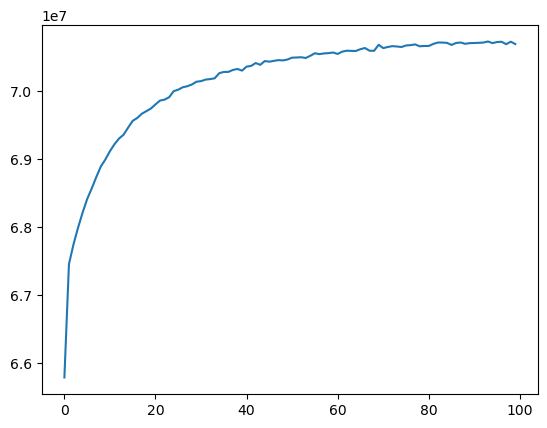

In [8]:
plt.plot(loss_list)

In [10]:
model.wv.most_similar('сабака', topn=20)

[('кошка', 0.8314971923828125),
 ('котка', 0.799300491809845),
 ('жывёліна', 0.7933835387229919),
 ('кот', 0.7918497323989868),
 ('сабачка', 0.7706744074821472),
 ('кацяня', 0.760342001914978),
 ('звер', 0.7451285719871521),
 ('дзік', 0.7436728477478027),
 ('мядзведзь', 0.7309896349906921),
 ('малпа', 0.7297574877738953),
 ('лісіца', 0.7211086750030518),
 ('конь', 0.7209383845329285),
 ('пацук', 0.7193618416786194),
 ('бык', 0.7151439189910889),
 ('муха', 0.7126638889312744),
 ('драпежнік', 0.7105709314346313),
 ('каза', 0.7051055431365967),
 ('асёл', 0.7039604783058167),
 ('пародзісты', 0.6996980905532837),
 ('бомж', 0.6990068554878235)]

In [11]:
model.wv.index_to_key[:10]

['быць',
 'год',
 'беларускі',
 'беларусь',
 'чалавек',
 'магчы',
 'час',
 'усё',
 'дзень',
 'большыць']

In [12]:
model.save("word2vec-cc100-skipgram-d100-w3-min10.model")

INFO:gensim.utils:Word2Vec lifecycle event {'fname_or_handle': 'word2vec-cc100-skipgram-d100-w3-min10.model', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2023-05-19T21:45:51.693746', 'gensim': '4.3.1', 'python': '3.11.3 | packaged by conda-forge | (main, Apr  6 2023, 09:05:00) [Clang 14.0.6 ]', 'platform': 'macOS-12.6-x86_64-i386-64bit', 'event': 'saving'}
INFO:gensim.utils:not storing attribute cum_table
INFO:gensim.utils:saved word2vec-cc100-skipgram-d100-w3-min10.model


In [13]:
model.wv.save_word2vec_format('word2vec-cc100-skipgram-d100-w3-min10.vectors')

INFO:gensim.models.keyedvectors:storing 79373x100 projection weights into word2vec-cc100-skipgram-d100-w3-min10.vectors
